In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('titanic-passengers.csv',delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


**PassengerId, Pclass, Age, SibSp, Parch, Fare are numerical data**

**Survived, Name, Sex, Ticket, Cabin, Embarked are categorical data**

In [3]:
df.shape


(891, 12)

**The dataframe contains 891 observations and 12 features**

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**From this result, Age contains 177 null values, Cabin has 687 null values, Embarked contains 2 null values**

In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Dealing with missing values
# Embarked feature contains 2 missing values, let's replace them to the most frequent values which is 'S': Southampton

df['Embarked'].fillna('S',inplace=True)

# Let's replace missing values with the mean value

df['Age'].fillna(df['Age'].mean(), inplace=True)

# Previously, we can see that Cabin feature contains 687 missing values. Let's drop this column
df.drop(columns='Cabin',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
# Data transformation to numerical data on Survived feature

new_survived={'Survived':{'No':0,'Yes':1}}
df.replace(new_survived,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


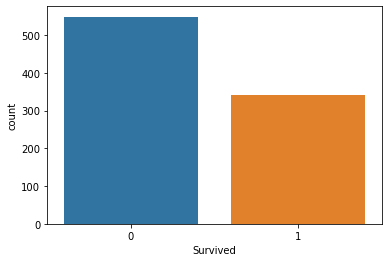

In [8]:

# Features distribution study: number of survivors

sns.countplot(x='Survived',data=df)

plt.show()


In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**549 persons died and 342 persons survived to the Titanic disaster**

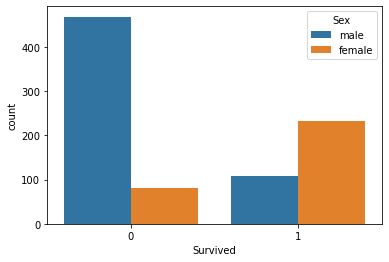

In [10]:
# Features distribution study based on Sex
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

In [11]:
df[['Sex','Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

**Among survivors, 233 were female and 109 were male. 468 men and 81 women died. A high rate of female survivors is noticed.**

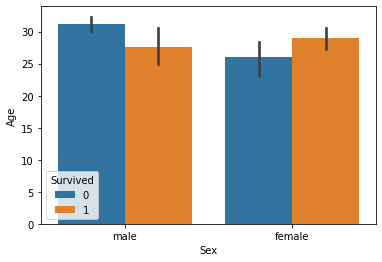

In [12]:
sns.barplot(y='Age',x='Sex',hue='Survived',data=df)
plt.show()

**Low survival rate for male is noticed at the age of 30, high survival rate for female at the age of 30**

In [13]:
# Features distribution study based on Pclass

df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**The 3rd class wagon contains the most numbers of passengers**

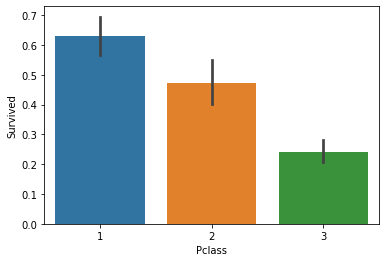

In [14]:
sns.barplot(x='Pclass',y='Survived',data=df)

plt.show()

**There's a high survival probability on class 1**

In [15]:
# Feature distribution based on Embarked

df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Southampton is the most important port of embarkation in terms of passengers**

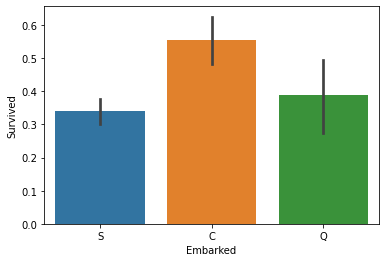

In [16]:
sns.barplot(x='Embarked',y='Survived',data=df)
plt.show()

**The highest probability survival is shown at Cherbourg embarkation**

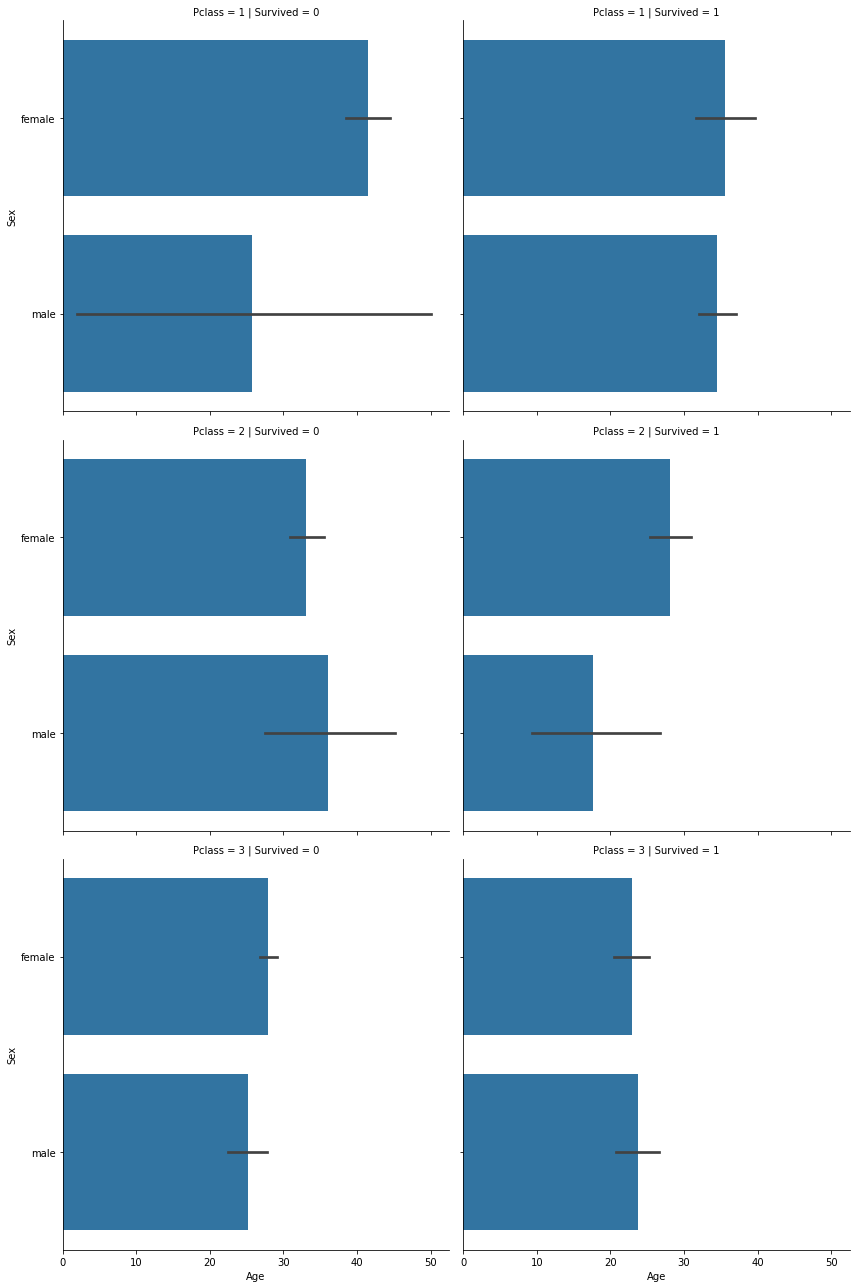

In [17]:
grid=sns.FacetGrid(df,row='Pclass',col='Survived',size=6)
grid.map(sns.barplot,'Age','Sex')
plt.show()

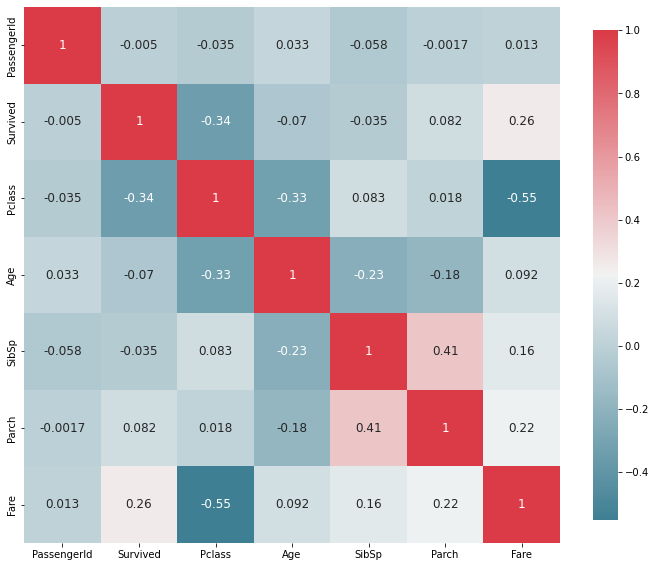

In [18]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

**The output shows the correlation coefficient heatmap which measures the strength of the relationship between each feature**
**in our dataset. For our study, as 'Survived' feature is our target variable,we are able to explore the relationship between**
**'Survived' feature with all other features through the output result.** 
**From the output result, the correlation coefficient between 'Fare' and 'Survived' features shows a positive relationship 
direction, significantly as well as fare is expensive, the survival probability increases. This conclusion is in accordance**
**with the plot between 'Pclass' and 'Survived', as 'Pclass' is strongly correlated with 'Fare'.**

In [19]:
# Use groupby function combined with mean() to view the relation between Pclass and survived

df[['Pclass','Survived']].groupby('Pclass').mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**First class passengers have a high survival probability**

In [35]:
# Creation of new column called Title which contains the appropriate title for each individual

df['Title']=df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# Transform data for Sex feature to numerical data

sex_dict={'Sex':{'female':0,'male':1}}
df.replace(sex_dict,inplace=True)

# Visualize correlation between Title and other features (Sex,Age,Fare...)

df[['Title','Age','Fare','Sex','Survived']].groupby('Title').mean()


,Age,Fare,Sex,Survived
Title,,,,
Capt,70.000000,71.000000,1.000000,0.000000
Col,58.000000,31.025000,1.000000,0.500000
Don,40.000000,27.720800,1.000000,0.000000
Dr,40.242731,49.168457,0.857143,0.428571
Jonkheer,38.000000,0.000000,1.000000,0.000000
Lady,48.000000,39.600000,0.000000,1.000000
Major,48.500000,28.525000,1.000000,0.500000
Master,7.086662,34.703125,1.000000,0.575000
Miss,23.341584,43.797873,0.000000,0.697802


In [27]:

Title_Dictionary = {
                        "Capt":"Officer",
                        "Col":"Officer",
                        "Major":"Officer",
                        "Dr":"Officer",
                        "Rev":"Officer",
                        "Jonkheer":"Royalty",
                        "Don":"Royalty",
                        "Sir":"Royalty",
                        "Lady":"Royalty",
                        "the Countess":"Royalty",
                        "Dona":"Royalty",
                        "Mme":"Miss",
                        "Mlle":"Miss",
                        "Miss":"Miss",
                        "Ms":"Mrs",
                        "Mr":"Mrs",
                        "Mrs":"Mrs",
                        "Master":"Master"
                   }
                   

df['Title']=df['Title'].map(Title_Dictionary)
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
881,699,0,1,"Thayer, Mr. John Borland",1,49.000000,1,1,17421,110.8833,C,Mrs
882,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",0,54.000000,1,3,29105,23.0000,S,Mrs
883,809,0,2,"Meyer, Mr. August",1,39.000000,0,0,248723,13.0000,S,Mrs
884,278,0,2,"Parkes, Mr. Francis ""Frank""",1,29.699118,0,0,239853,0.0000,S,Mrs
885,150,0,2,"Byles, Rev. Thomas Roussel Davids",1,42.000000,0,0,244310,13.0000,S,Officer
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,C,Mrs
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,S,Mrs
890,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",0,19.000000,0,0,250655,26.0000,S,Miss


In [34]:
# Visualize correlation between new Title and other features (Sex,Age,Fare...)

df[['Title','Age','Fare','Sex','Survived']].groupby('Title').mean()

,Age,Fare,Sex,Survived
Title,,,,
Master,7.086662,34.703125,1.000000,0.575000
Miss,23.352261,44.104416,0.000000,0.702703
Mrs,32.389705,28.447283,0.804044,0.281493
Officer,45.761062,35.786344,0.944444,0.277778
Royalty,41.600000,42.150000,0.600000,0.600000


In [46]:
# Create FamilySize new column

df['FamilySize']=df['SibSp']+df['Parch']+1

df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**This feature is very useful in order to conclude that big family has a low probability survival rate**

In [49]:
# Drop some features

df.drop(['PassengerId','Name','Parch','SibSp'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
0,0,2,1,28.0,248740,13.0000,S,Mr,1
1,0,3,1,25.0,348123,7.6500,S,Mr,1
2,0,3,1,20.0,350050,7.8542,S,Mr,1
3,0,3,0,29.0,349909,21.0750,S,Mrs,5
4,0,1,1,31.0,F.C. 12750,52.0000,S,Mr,2
